In [11]:
import pandas as pd 

sample_1 = pd.read_excel("c:\\work\\sample_1.xlsx", header=1, skipfooter=2, usecols="A:C")
sample_1



,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [12]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 160.0+ bytes


In [13]:
sample_1.describe()

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [14]:
sample_1["입국객수"]

0    106320
1    191436
2       319
3        42
4    158912
5    232943
Name: 입국객수, dtype: int64

In [18]:
sample_1[["국적코드","입국객수"]]


,국적코드,입국객수
0,A01,106320
1,A01,191436
2,A31,319
3,A31,42
4,A18,158912
5,A18,232943


In [20]:
#기존에 없는 '기준년월'이라는 컬럼을 추가하고 데이터를 추가한다. 
sample_1['기준년월'] = '2019-11'
sample_1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [21]:
#필터링실습
condition = (sample_1['성별'] == '남성')
condition 

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool

In [22]:
sample_1[condition]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [23]:
condition = (sample_1['입국객수'] >= 150000)
sample_1[condition]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [24]:
#이번에는 조건이 여러개인 경우 
conditions = (sample_1['성별'] == '남성') & (sample_1['입국객수'] >= 150000)
conditions

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [25]:
#두개의 컬럼에 대해 필터링하기
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
4,A18,남성,158912,2019-11


In [26]:
#여러 조건 중 하나라도 만족하면 되는 경우는 |(or)를 사용한다.
conditions = (sample_1['국적코드'] == 'A01') \
    | (sample_1['국적코드'] == 'A18')
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [27]:
#한 컬럼에 대해 여러 조건으로 필터링하기
conditions = (sample_1['국적코드'].isin(['A01','A18']))
conditions 

0     True
1     True
2    False
3    False
4     True
5     True
Name: 국적코드, dtype: bool

In [28]:
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [29]:
#만약 국적코드에서 A01,A18에 해당하지 않는 경우만 보고 싶다면 
conditions = (sample_1['국적코드'].isin(['A01','A18']))
sample_1[conditions == False]


,국적코드,성별,입국객수,기준년월
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11


In [30]:
#데이터 통합 - 옆으로 통합(merge)
#지금까지 국적이 코드로 표현돼 있어 실제로 어느 나라에 대한 입국객수인지 알 수가 없다. 
#이번에는 엑셀에서의 vloopup함수로 처리했던 작업을 파이썬에서 어떻게 처리하는지 살펴본다. 
code_master = pd.read_excel('c:\\work\\sample_codemaster.xlsx')
code_master

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


In [31]:
#왼쪽과 오른쪽 테이블을 어떻게 정할지 지정(left, right)
#how는 왼쪽 테이블을 기준으로 두 테이블을 결합한다고 지정
#left_on 왼쪽 테이블의 기준 컬럼은 국적코드다.
#right_on 오른쪽 테이블의 기준 컬럼은 국적코드다. 
sample_1_code = pd.merge(left = sample_1,
    right = code_master,
    how = 'left',
    left_on = '국적코드',
    right_on = '국적코드')
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [32]:
#NaN값이 출력되서 만약 양쪽 테이블에서 공통으로 존재하는 경우에 대해 출력하고 싶다면 
#how = inner는 두 테이블의 기준 컬럼의 값이 서로 일치하는 경우에만 데이터를 통합하는 옵션이다. 
sample_1_code_inner = pd.merge(left = sample_1, 
    right = code_master,
    how = 'inner',
    left_on = '국적코드',
    right_on = '국적코드')
sample_1_code_inner 

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A18,남성,158912,2019-11,중국
3,A18,여성,232943,2019-11,중국


In [34]:
#데이터 통합 - 아래로 통합(append)
#월별로 관리, 년간관리하는 파일들을 통합하는 경우
sample_2 = pd.read_excel('c:\\work\\sample_2.xlsx', header=1,
    skipfooter=2,usecols='A:C')
sample_2['기준년월'] = '2019-12'
sample_2_code = pd.merge(left=sample_2, 
        right = code_master,
        how = 'left',
        left_on = '국적코드',
        right_on = '국적코드')
sample_2_code 

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [35]:
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [36]:
#두 데이터의 컬럼 순서가 동일한 것을 확인했으니 pd.append()를 사용해서 통합한다. 
#원래의 인덱스를 사용하지 않으려고 ignore_index = True를 지정함. 
sample = sample_1_code.append(sample_2_code, ignore_index = True)
sample 

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [37]:
#데이터 저장(Excel)
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [38]:
#to_excel()을 사용한다.
sample.to_excel("c:\\work\\sample.xlsx")


In [39]:
#to_excel()을 사용한다.
#저장할 때 index번호를 제외하고 저장한다면 
sample.to_excel("c:\\work\\sample.xlsx", index = False) 



In [40]:
#데이터 집계(피벗)
#values = '입국객수' 피벗테이블 내부에 들어갈 값은 입국객수로 한다. 
#index = '국적명' 피벗테이블 로우에 국적명을 배치한다. 
#columns = '기준년월' 피벗테이블 컬럼에 기준년월을 배치한다. 
#aggfunc = 'mean' 입국객수를 국정명과 기준년월 기준으로 평균을 계산한다. 
sample_pivot = sample.pivot_table(values = '입국객수',
        index = '국적명',
        columns = '기준년월',
        aggfunc = 'mean')
sample_pivot

기준년월,2019-11,2019-12
국적명,,
일본,148878.0,128146.5
중국,195927.5,202281.5


In [42]:
#국적에 따른 최대 입국객수를 알아본다.
sample_pivot_2 = sample.pivot_table(values = '입국객수',
        index = '국적명',
        aggfunc = 'max')
sample_pivot_2

,입국객수
국적명,
일본,191436
중국,249023


In [44]:
from selenium import webdriver
driver = webdriver.Chrome('c:\work\chromedriver.exe')

In [46]:
url = 'https://www.naver.com'
driver.get(url)

In [47]:
html = driver.page_source 

In [5]:
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''

from bs4 import BeautifulSoup 

soup = BeautifulSoup(html, 'html.parser') 

In [6]:
#태그명으로 찾기
tags_span = soup.select('span')
tags_p = soup.select('p')


In [7]:
#id와 class로 찾기
# #뒤에 id를 입력해서 찾거나 .뒤에 class를 넣는 방법이 있다. 
ids_fruits1 = soup.select('#fruits1')
class_price = soup.select('.price')
#태그가 span이면서 class명이 price인 것을 모두 찾는다. 
tags_span_class_price = soup.select('span.price')
tags_span_class_price

[<span class="price"> 3000원 </span>]

In [8]:
#상위 구조 활용
#정보가 담긴 태그의 속성만으로는 찾기가 어려울 경우 부모 태그 아래에 있는지 등의 정보를 추가해서 찾을 수 있다.
#한단계 아래를 의미할 때는 '>'기호를 사용한다. 
#상위 태그는 부모태그, 하위 태그는 자식 태그라고 부른다. 
tags_name = soup.select('span.name')
tags_name 

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [10]:
#이때 파인애플은 제외하고 바나나만 찾기 위해 바나나가 속한 부모 태그 정보를 추가한다. 
#부모 태그를 추가하면 바나나만 출력된다.
tags_banana1 = soup.select('#fruits1 > span.name')
tags_banana1

[<span class="name"> 바나나 </span>]

In [11]:
#태그 위치로 위치 찾기2 
#결과는 동일하지만 첫번째 코드는 상위태그1(div.sale)바로 아래에 있는 상위 태그2(#fruits1)을 찾고,
#상위태그2(#fruits1) 바로 아래에 있는 태그(span.name)을 모두 찾았다. 
#두번째 코드는 상위태그(div.sale) 바로 아래에 있는 태그뿐 아니라 몇 단계 아래의 태그 중에서 태그 정보(span.name)
#을 모두 찾았다. 
tags_banana2 = soup.select('div.sale > #fruits1 > span.name')
tags_banana3 = soup.select('div.sale span.name')
print(tags_banana2)
print(tags_banana3)


[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]


In [12]:
#태그 그룹에서 하나의 태그만 선택
tags = soup.select('span.name')
tag_1 = tags[0]
tag_1

<span class="name"> 바나나 </span>

In [13]:
tags = soup.select('span.name')
for tag in tags:
    print(tag)

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>


In [15]:
#선택한 태그에서 텍스트, 속성값 가져오기
tags = soup.select('a')
tag = tags[0]
content = tag.text 
content 
link = tag['href']
link 

'http://bit.ly/forPlaywithData'

In [17]:
#멜론 노래 순위 정보 크롤링
from selenium import webdriver
driver = webdriver.Chrome('c:\work\chromedriver.exe')

url = 'https://www.melon.com/chart/index.htm'
driver.get(url)


In [18]:
#첫번째 줄에서 table > tbody > tr을 통해 곡 정보가 포함된 tr태그를 모두 찾았다. 
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
songs = soup.select('table > tbody > tr')
print(len(songs))
print(songs[0])

100
<tr data-song-no="33507137">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Butter 곡 선택" type="checkbox" value="33507137"/></div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10612483');" title="Butter">
<img alt="Butter - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/106/12/483/10612483_20210521111412_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('33507137');" title="Butter 곡정보"><span class="none">곡정보</span></a>
</div></td>
<td><div class="wrap">
<div class="wrap_song_info">
<div class="ellipsis rank01"><span>
<a href="javascript:melon.play.playSong('19030101',33507137);" title="Butter 재생">Butter</a>
</span></div>
<br/>
<div class="ellipsis rank02">
<a href=

In [22]:
#곡 제목찾기
#조건에 만족하는 곡의 갯수가 6개
song = songs[0]
title = song.select('a')
len(title)


6

In [23]:
#곡 제목찾기2
title = song.select('span > a')
len(title)

2

In [24]:
#곡 제목찾기3
title = song.select('div.ellipsis.rank01 > span > a')
len(title)

1

In [25]:
#곡 제목 가져오기
title = song.select('div.ellipsis.rank01 > span > a')[0].text 
title

'Butter'

In [26]:
#가수 정보 가져오기
singer = song.select('div.ellipsis.rank02 > a')[0].text 
singer

'방탄소년단'

In [28]:
#이번에는 100곡의 노래순위 정보 가져오기
for song in songs:
    title = song.select('div.ellipsis.rank01 > span >a')[0].text 
    singer = song.select('div.ellipsis.rank02 > a')[0].text 
    print(title, singer, sep = "|")

Butter|방탄소년단
Dun Dun Dance|오마이걸 (OH MY GIRL)
헤픈 우연|헤이즈 (Heize)
Peaches (Feat. Daniel Caesar & Giveon)|Justin Bieber
Next Level|aespa
롤린 (Rollin')|브레이브걸스
라일락|아이유
상상더하기|MSG워너비 TOP 8 (별루지, 김정수, 강창모, 정기석, 이동휘, 이상이, 박재정, 원슈타인)
운전만해 (We Ride)|브레이브걸스
Celebrity|아이유
Dynamite|방탄소년단
ASAP|STAYC(스테이씨)
Timeless|SG 워너비
상상더하기|라붐 (LABOUM)
마.피.아. In the morning|ITZY (있지)
내 손을 잡아|아이유
라라라|SG 워너비
사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)|호미들
멜로디|ASH ISLAND
밝게 빛나는 별이 되어 비춰줄게|송이한
내사람|SG 워너비
LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)|양요섭
Coin|아이유
밤하늘의 별을(2020)|경서
On The Ground|로제 (ROSÉ)
체념|정상동기 (김정수, 정기석, 이동휘, 이상이)
Savage Love (Laxed - Siren Beat) (BTS Remix)|Jawsh 685
잠이 오질 않네요|장범준
어푸 (Ah puh)|아이유
Lovesick Girls|BLACKPINK
취기를 빌려 (취향저격 그녀 X 산들)|산들
Blueming|아이유
에잇(Prod.&Feat. SUGA of BTS)|아이유
그냥 안아달란 말야|다비치
VVS (Feat. JUSTHIS) (Prod. GroovyRoom)|미란이 (Mirani)
나랑 같이 걸을래 (바른연애 길잡이 X 적재)|적재
작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)|방탄소년단
Dolphin|오마이걸 (OH MY GIRL)
추억은 만남보다 이별에 남아|정동하
Life Goes On|방탄소년단
12:45 (Stripp

In [29]:
#selenium을 활용한 크롤링
#selenium을 사용하면 웹 페이지에 계속 접속한 상태로 정보를 가져온다는 특징이 있다. 
driver = webdriver.Chrome('c:\work\chromedriver.exe')
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)

songs = driver.find_elements_by_css_selector('table > tbody > tr')
for song in songs: 
    title = song.find_elements_by_css_selector('div.ellipsis.rank01 > span > a')[0].text 
    singer = song.find_elements_by_css_selector('div.ellipsis.rank02 > a')[0].text 
    print(title, singer, sep="||")

Butter||방탄소년단
Dun Dun Dance||오마이걸 (OH MY GIRL)
헤픈 우연||헤이즈 (Heize)
Peaches (Feat. Daniel Caesar & Giveon)||Justin Bieber
Next Level||aespa
롤린 (Rollin')||브레이브걸스
라일락||아이유
상상더하기||MSG워너비 TOP 8 (별루지, 김정수, 강창모, 정기석, 이동휘, 이상이, 박재정, 원슈타인)
운전만해 (We Ride)||브레이브걸스
Celebrity||아이유
Dynamite||방탄소년단
ASAP||STAYC(스테이씨)
Timeless||SG 워너비
상상더하기||라붐 (LABOUM)
마.피.아. In the morning||ITZY (있지)
내 손을 잡아||아이유
라라라||SG 워너비
사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)||호미들
멜로디||ASH ISLAND
밝게 빛나는 별이 되어 비춰줄게||송이한
내사람||SG 워너비
LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)||양요섭
Coin||아이유
밤하늘의 별을(2020)||경서
On The Ground||로제 (ROSÉ)
체념||정상동기 (김정수, 정기석, 이동휘, 이상이)
Savage Love (Laxed - Siren Beat) (BTS Remix)||Jawsh 685
잠이 오질 않네요||장범준
어푸 (Ah puh)||아이유
Lovesick Girls||BLACKPINK
취기를 빌려 (취향저격 그녀 X 산들)||산들
Blueming||아이유
에잇(Prod.&Feat. SUGA of BTS)||아이유
그냥 안아달란 말야||다비치
VVS (Feat. JUSTHIS) (Prod. GroovyRoom)||미란이 (Mirani)
나랑 같이 걸을래 (바른연애 길잡이 X 적재)||적재
작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)||방탄소년단
Dolphin||오마이걸 (OH MY GIRL)
추억은 만남보다 이별에 남

In [30]:
#멜론 크롤링 결과를 엑셀로 저장하기 
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('c:\work\chromedriver.exe')
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)

html = driver.page_source 
soup = BeautifulSoup(html, 'html.parser')

In [31]:
#반복문을 이용해 곡과 가수명을 song_data에 저장하기
song_data = []
rank = 1 
songs = soup.select('table > tbody > tr')
for song in songs:
    title = song.select('div.rank01 > span > a')[0].text 
    singer = song.select('div.rank02 > a')[0].text 
    song_data.append(['Melon',rank,title,singer])
    rank = rank + 1 



In [32]:
#이렇게 수집된 데이터를 데이터프레임으로 만든다.
import pandas as pd 
columns = ['서비스','순위','타이틀','가수']
pd_data = pd.DataFrame(song_data, columns=columns)
pd_data.head()

,서비스,순위,타이틀,가수
0,Melon,1,Butter,방탄소년단
1,Melon,2,Dun Dun Dance,오마이걸 (OH MY GIRL)
2,Melon,3,헤픈 우연,헤이즈 (Heize)
3,Melon,4,Peaches (Feat. Daniel Caesar & Giveon),Justin Bieber
4,Melon,5,Next Level,aespa


In [33]:
#크롤링 결과를 엑셀로 저장하기
pd_data.to_excel('c:\work\melon.xlsx', index=False)

In [34]:
#벅스 크롤링 결과를 엑셀에 저장하기
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('c:\work\chromedriver.exe')
url = 'https://music.bugs.co.kr/chart'
driver.get(url)

html = driver.page_source 
soup = BeautifulSoup(html, 'html.parser')

In [35]:
#tr태그로 곡 정보 찾기1
songs = soup.select('tr')
print(len(songs))

104


In [36]:
#tr태그로 곡 정보 찾기 2 
songs = soup.select('tbody > tr')
print(len(songs))

103


In [37]:
#이번에는 table태그에 있는 byChart라는 class이름을 지정해 출력해 본다. 
songs = soup.select('table.byChart > tbody > tr')
print(len(songs))

100


In [38]:
print(songs[0])

<tr albumid="20398006" artistid="80079394" multiartist="N" mvid="594864" rowtype="track" trackid="32238640">
<input name="_isStream" type="hidden" value="32238640"/>
<input name="_isDown" type="hidden" value="32238640"/>
<td class="check"><input buyminquality="T" disc_id="1" name="check" title="Butter" type="checkbox" value="32238640"/></td>
<td>
<div class="ranking">
<strong>1</strong>
<p class="change none"><em>0</em><span>변동없음</span></p>
</div>
</td>
<td>
<a class="thumbnail" href="https://music.bugs.co.kr/album/20398006?wl_ref=list_tr_07_chart" onclick="
">
<span class="mask"></span>
<img alt="Butter 대표이미지" onerror="bugs.utils.imgError(this);" src="https://image.bugsm.co.kr/album/images/50/203980/20398006.jpg?version=20210529222035.0"/>
</a>
</td>
<td>
<a class="trackInfo" href="https://music.bugs.co.kr/track/32238640?wl_ref=list_tr_08_chart" onclick="
">곡정보</a>
</td>
<th scope="row">
<p adult_yn="N" class="title">
<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="b

In [39]:
#한개의 곡 정보 지정하기
song = songs[0]
#벅스 사이트에서 곡 제목 찾기1
title = song.select('a')
len(title)

11

In [40]:
title = song.select('p > a')
len(title)

2

In [41]:
#벅스 사이트에서 곡 제목 찾기3
title = song.select('p.title > a')
len(title)

1

In [42]:
#벅스 사이트에서 곡 제목 출력하기
title = song.select('p.title > a')[0].text 
title

'Butter'

In [46]:
#가수 이름 출력하기
singer = song.select('p.artist > a')[0].text.strip()
singer

'방탄소년단'

In [47]:
#벅스 100위 노래 순위 가져오기
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text 
    singer = song.select('p.artist > a')[0].text 
    print(title, singer, sep="|")

Butter|방탄소년단
Next Level|aespa
Dun Dun Dance|오마이걸(OH MY GIRL)
Given-Taken|ENHYPEN
헤픈 우연|헤이즈(Heize)
피날레 (Show And Prove)|비투비
Friend|비투비
그리워하다|비투비
ASAP|STAYC(스테이씨)
Show Your Love|비투비 포유
Blue Moon|비투비
너 없인 안 된다|비투비
상상더하기|MSG워너비 TOP 8 (별루지, 김정수, 강창모, 정기석, 이동휘, 이상이, 박재정, 원슈타인)
Peaches (feat. Daniel Caesar, Giveon)|Justin Bieber(저스틴 비버)
라일락|아이유(IU)
상상더하기|라붐(LABOUM)
롤린 (Rollin')|브레이브걸스(Brave Girls)
Dynamite|방탄소년단
체념|정상동기 (김정수, 정기석, 이동휘, 이상이)
운전만해 (We Ride)|브레이브걸스(Brave Girls)
마.피.아. In the morning|ITZY (있지)
Celebrity|아이유(IU)
Coin|아이유(IU)
Kiss Me More (feat. SZA)|Doja Cat(도자 캣)
만약에|M.O.M (별루지, 강창모, 박재정, 원슈타인)
처음처럼 (Feat. 개리)|헤이즈(Heize)
Life Goes On|방탄소년단
Je T′aime|조이 (JOY)
어푸 (Ah puh)|아이유(IU)
내 손을 잡아|아이유(IU)
Timeless|SG워너비
그냥 안아달란 말야|다비치
맛 (Hot Sauce)|NCT DREAM
고래 (Dive Into You)|NCT DREAM
Off My Face|Justin Bieber(저스틴 비버)
모든 날, 모든 순간 (Every day, Every Moment)|폴킴(Paul Kim)
감기 (Feat. 창모)|헤이즈(Heize)
Savage Love (Laxed - Siren Beat) (BTS Remix)|Jawsh 685
I Love U|성시경
미안해 널 사랑해 (Feat. 김필)|헤이즈(Heize

In [48]:
#반복문으로 곡과 가수명을 song_data에 저장하기
song_data = []
rank = 1 
songs = soup.select('table.byChart > tbody > tr')
for song in songs:
    title = song.select('p.title > a')[0].text 
    singer = song.select('p.artist > a')[0].text 
    song_data.append(['Bugs', rank, title, singer])
    rank = rank + 1 

    

In [49]:
#데이터프레임 반드릭
import pandas as pd 
columns = ['서비스','순위','타이틀','가수']
pd_data = pd.DataFrame(song_data, columns = columns)
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     100 non-null    object
 1   순위      100 non-null    int64 
 2   타이틀     100 non-null    object
 3   가수      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 2.0+ KB


In [51]:
#엑셀 파일로 저장
pd_data.to_excel('c:\\work\\bugs.xlsx', index=False)


In [54]:
#지니 크롤링 결과를 엑셀로 저장하기 
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('c:\work\chromedriver.exe')
url = 'https://www.genie.co.kr/chart/top200'
driver.get(url)

html = driver.page_source 
soup = BeautifulSoup(html, 'html.parser')

In [55]:
songs = soup.select('table > tbody > tr')
print(len(songs))

50


In [57]:
#지니 결과 엑셀로 저장하기
song_data = []
rank = 1 
songs = soup.select('tbody > tr')
for song in songs: 
    title = song.select('a.title')[0].text.strip()
    singer = song.select('a.artist')[0].text 
    song_data.append(['Genie',rank,title,singer])
    rank = rank + 1 

columns = ['서비스','순위','타이틀','가수']
pd_data = pd.DataFrame(song_data, columns=columns)
pd_data.to_excel('c:\work\genie.xlsx', index=False)

In [59]:
#멜론, 벅스, 지니 크롤링 엑셀 파일 통합하기 
import pandas as pd 
excel_names = ['c:\\work\\melon.xlsx','c:\\work\\bugs.xlsx','c:\\work\\genie.xlsx']
appended_data = pd.DataFrame()
for name in excel_names:
    pd_data = pd.read_excel(name)
    appended_data = appended_data.append(pd_data)

appended_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서비스     250 non-null    object
 1   순위      250 non-null    int64 
 2   타이틀     250 non-null    object
 3   가수      250 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.8+ KB


In [60]:
#통합한 크롤링 결과를 엑셀 파일로 저장하기
appended_data.to_excel('c:\\work\\total.xlsx', index=False)


In [61]:
#유튜브 랭킹 데이터 수집하기
from selenium import webdriver 
from bs4 import BeautifulSoup
import time 
import pandas as pd 

browser = webdriver.Chrome('c:\\work\\chromedriver.exe')
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
browser.get(url)


In [63]:
#페이지 정보 가져오기
html = browser.page_source 
soup = BeautifulSoup(html, 'html.parser')


In [64]:
#tr태그 추출하기
channel_list = soup.select('tr')
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [65]:
#tr 태그 확인하기
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [66]:
#채널 하나만 출력하기
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AAUvwnheBe2kEkBDitMl_iIGaTiiP4PeG6pO562vu9ch7g=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AAUvwnheBe2kEkBDitMl_iIGaTiiP4PeG6pO562vu9ch7g=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [67]:
#카테코리 정보 추출하기
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [68]:
#채널명 찾아오기
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [69]:
#구독자수, View수, 동영상수 추출하기
subscriber = channel.select('.subscriber_cnt')[0].text 
view = channel.select('.view_cnt')[0].text 
video = channel.select('.video_cnt')[0].text 

print(subscriber)
print(view)
print(video)


6160만
178억0787만
355개


In [70]:
#반복문으로 채널 정보 추출하기
channel_list = soup.select('tbody > tr')
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text 
    view = channel.select('.view_cnt')[0].text 
    video = channel.select('.video_cnt')[0].text 
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 6160만 178억0787만 355개
HYBE LABELS [음악/댄스/가수] 5680만 168억4949만 611개
BANGTANTV [음악/댄스/가수] 5090만 102억7144만 1,490개
SMTOWN [음악/댄스/가수] 2750만 209억7936만 3,697개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2400만 65억2152만 2,635개
1theK (원더케이) [음악/댄스/가수] 2280만 199억5659만 14,556개
JYP Entertainment [음악/댄스/가수] 2070만 129억3806만 1,263개
Mnet K-POP [음악/댄스/가수] 1800만 123억0955만 24,113개
JFlaMusic [음악/댄스/가수] 1710만 33억5670만 278개
KBS WORLD TV [TV/방송] 1630만 119억1809만 51,216개
officialpsy [음악/댄스/가수] 1490만 84억7720만 90개
BIGBANG [음악/댄스/가수] 1360만 65억6244만 773개
Jane ASMR 제인 [음식/요리/레시피] 1340만 44억6094만 1,111개
Nao FunFun [키즈/어린이] 1080만 337만 23개
TWICE [음악/댄스/가수] 1070만 19억1473만 547개
Stone Music Entertainment [음악/댄스/가수] 980만 75억6766만 7,560개
DuDuPopTOY [키즈/어린이] 967만 42억8001만 1,652개
MBCkpop [TV/방송] 932만 71억4065만 40,185개
서은이야기[SeoeunStory] [키즈/어린이] 924만 39억0519만 965개
핑크퐁 (인기 동요・동화) [키즈/어린이] 922만 55억3291만 2,137개
Larva TUBA [키즈/어린이] 912만 39억3021만 2,549개
Toymong tv 토이몽

IndexError: list index out of range

In [71]:
#반복문으로 유튜브 랭킁 화면의 여러 페이지를 크롤링하기 
results = []
for page in range(1,11):
    url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    browser.get(url)
    time.sleep(2)
    html = browser.page_source 
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip()
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text 
        video = channel.select('.video_cnt')[0].text 
        data = [title, category, subscriber, view, video]
        results.append(data)

In [73]:
#엑셀에 저장
df = pd.DataFrame(results)
df.columns = ['title','category','subscriber','view','video']
df.to_excel('c:\\work\\youtube_rank.xlsx',index=False)

In [74]:
#유튜브 랭킹 데이터 시각화 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 
import platform 

if platform.system() == "Windows":
    path = 'c:\\Windows\\Fonts\\malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name)
elif platform.system() == "Darwin":
    rc('font', family='AppleGothic')
else:
    print('Check your OS system')






In [76]:
#엑셀 로딩 
df = pd.read_excel('c:\\work\\youtube_rank.xlsx')
df.head()


,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],6160만,178억0787만,355개
1,HYBE LABELS,[음악/댄스/가수],5680만,168억4949만,611개
2,BANGTANTV,[음악/댄스/가수],5090만,102억7144만,"1,490개"
3,SMTOWN,[음악/댄스/가수],2750만,209억7936만,"3,697개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [77]:
#데이터 살펴보기 
df['subscriber'][0:10]

0    6160만
1    5680만
2    5090만
3    2750만
4    2650만
5    2400만
6    2280만
7    2070만
8    1800만
9    1710만
Name: subscriber, dtype: object

In [78]:
df['subscriber'].str.replace('만', '000')[0:10]

0    6160000
1    5680000
2    5090000
3    2750000
4    2650000
5    2400000
6    2280000
7    2070000
8    1800000
9    1710000
Name: subscriber, dtype: object

In [79]:
#판다스에서 문자열을 다루는 다양한 함수를 제공한다. 
df['replaced_subscriber'] = df['subscriber'].str.replace('만','000')
df.head()

,title,category,subscriber,view,video,replaced_subscriber
0,BLACKPINK,[음악/댄스/가수],6160만,178억0787만,355개,6160000
1,HYBE LABELS,[음악/댄스/가수],5680만,168억4949만,611개,5680000
2,BANGTANTV,[음악/댄스/가수],5090만,102억7144만,"1,490개",5090000
3,SMTOWN,[음악/댄스/가수],2750만,209억7936만,"3,697개",2750000
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개,2650000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   object
dtypes: object(6)
memory usage: 23.5+ KB


In [81]:
#replaced_subscriber의 데이터 형식이 int가 아닌 것을 볼 수 있다.
#astype()함수를 통해 변환한다. 
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1000 non-null   object
 1   category             1000 non-null   object
 2   subscriber           1000 non-null   object
 3   view                 1000 non-null   object
 4   video                1000 non-null   object
 5   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 23.5+ KB


In [82]:
#이제는 카테고리별 채널 수와 구독사 수를 파이차트로 시각화하기 위해 
#category.컬럼에서 개별 카테고리의 개수를 세어야 하고 replaced_subscriber컬럼에서
#카테고리별 구독자 수를 모두 더해야 한다. 
pivot_df = df.pivot_table(index = 'category', values='replaced_subscriber', aggfunc=['sum','count'])
pivot_df.head()

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],20210000,50
[TV/방송],77690000,120
[뉴스/정치/사회],19350000,30
[미분류],8560000,10
[애완/반려동물],7800000,20


In [84]:
#결과에서 카테고리별 구독자 수와 채널 수를 확인할 수 있다. 이번에는 해당 컬럼을 알아보기 쉽게 변경한다. 
pivot_df.columns = ['subscriber_sum', 'category_count']
pivot_df.head()


,subscriber_sum,category_count
category,,
[BJ/인물/연예인],20210000,50
[TV/방송],77690000,120
[뉴스/정치/사회],19350000,30
[미분류],8560000,10
[애완/반려동물],7800000,20


In [85]:
#각 컬럼명이 subscriber_sum과 category_count로 변경되었다. 하지만 각 컬럼은 데이터프레임에서 인덱스로 
#설정되어 있어서 reset_index()를 사용해서 인덱스를 초기화한다.
pivot_df = pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],20210000,50
1,[TV/방송],77690000,120
2,[뉴스/정치/사회],19350000,30
3,[미분류],8560000,10
4,[애완/반려동물],7800000,20


In [86]:
#데이터프레임을 내림차순 정렬하기
pivot_df = pivot_df.sort_values(by='subscriber_sum', ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
6,[음악/댄스/가수],475950000,360
8,[키즈/어린이],160730000,230
5,[음식/요리/레시피],80970000,140
1,[TV/방송],77690000,120
0,[BJ/인물/연예인],20210000,50


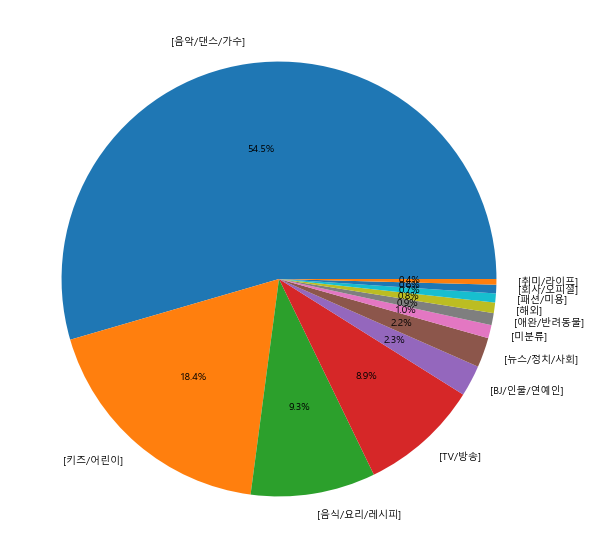

In [87]:
#파이차트 그리기
#구독자수를 시각화하기 때문에 pivot_df['subscriber_sum]을 입력한다. 
#그리고 라벨을 출력하고 각 수치값을 퍼센트로 표기한다. 
plt.figure(figsize=(30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()

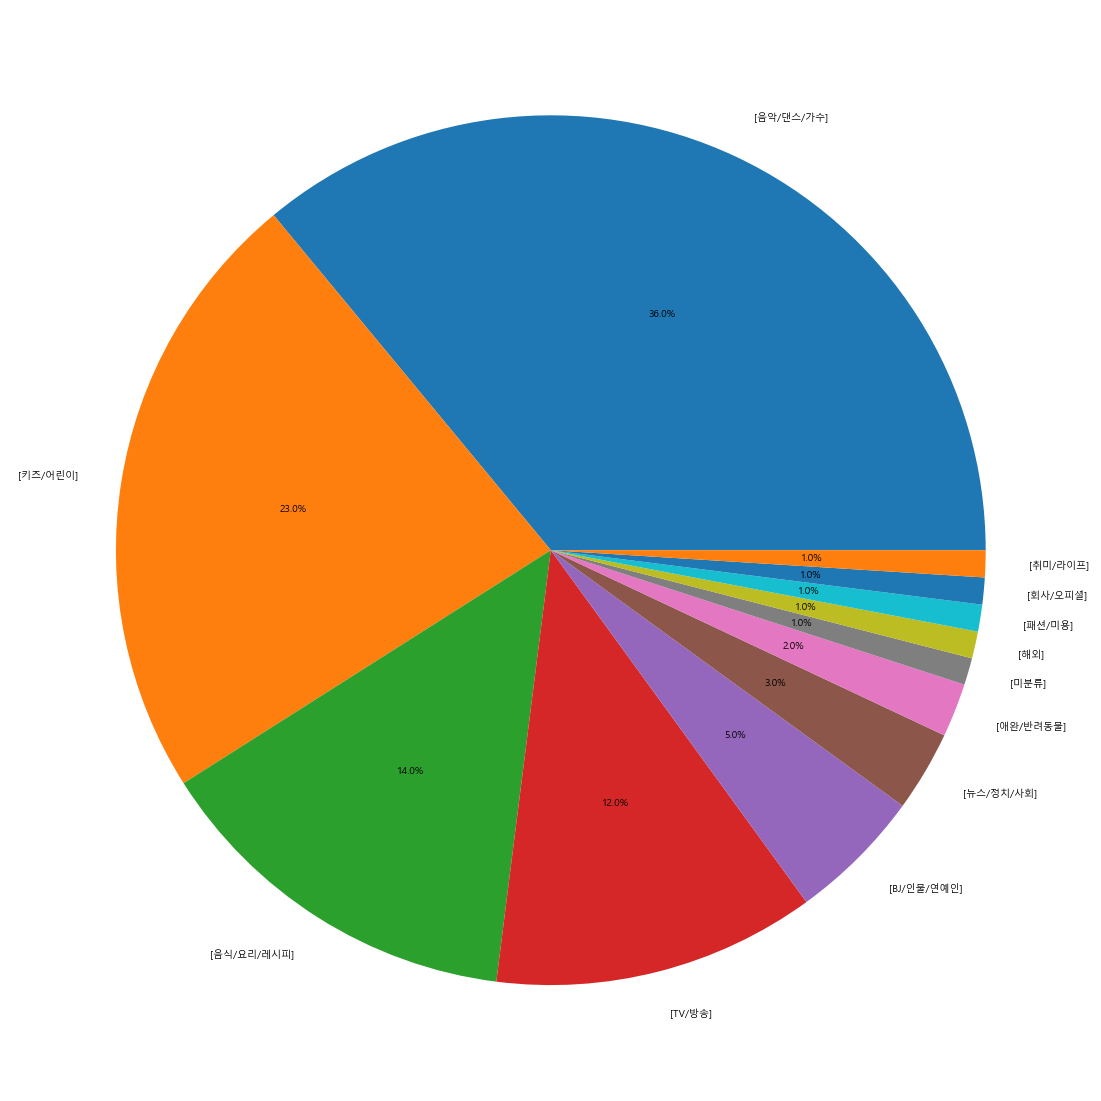

In [90]:
#이번에는 카테고리 채널 수를 시각화한다. 
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()
plt.figure(figsize=(60,20))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], autopct='%1.1f%%')
plt.show()